<a href="https://colab.research.google.com/github/Kavindutharaka/cat_dog_classifier/blob/main/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets -q

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: elfinkavi
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:03<00:00, 74.9MB/s]


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [ ]:
train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"

In [ ]:
import tensorflow as tf

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)
validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)
test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                        batch_size=BATCH_SIZE,
                                                        image_size=IMAGE_SIZE)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [ ]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


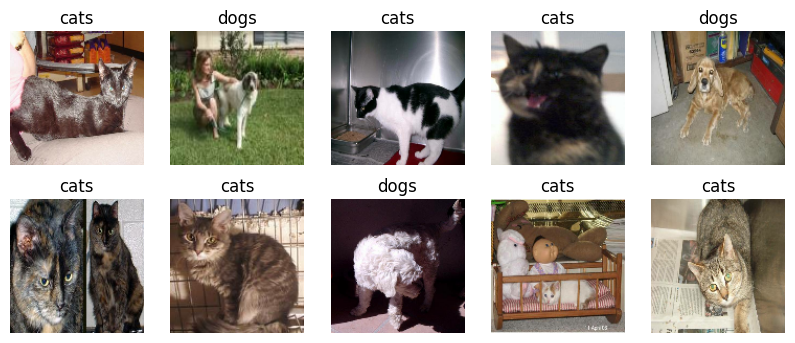

In [ ]:
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

In [ ]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.15117954 0.08451287 0.12372855]
   [0.1564951  0.08982843 0.12904412]
   [0.14387254 0.07720588 0.11642157]
   ...
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.15078124 0.08411458 0.12333027]
   [0.1463848  0.07971814 0.11893383]
   [0.13852635 0.07185968 0.11107536]
   ...
   [0.         0.         0.        ]
   [0.         0.00127145 0.        ]
   [0.         0.         0.        ]]

  [[0.15681386 0.09014719 0.12936288]
   [0.15010071 0.08343404 0.12264973]
   [0.1491728  0.08250613 0.12172181]
   ...
   [0.00392157 0.         0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.7237403  0.6738876  0.726761  ]
   [0.7528033  0.7035823  0.75956535]
   [0.77319306 0.71951526 0.7698836 ]
   ...
   [0.04705882 0.00392157 0.03529412]
   [0.05098039 0.         0.03529412]
   [0.0395804  0.         0.03137255]]

  [[0.7596398  0.66668636 0.694030

In [ ]:
pretrained_model = tf.keras.applications.xception.Xception(include_top=False,
                                                           input_shape=(128,128,3),
                                                           weights='imagenet',
                                                           pooling='max')
for layer in pretrained_model.layers:
  layer.trainable = False

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2)
    ]
)

In [ ]:
model = tf.keras.models.Sequential()

model.add(pretrained_model)

# model.add(tf.keras.layers.Conv2D(32,kernel_size=3, activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D())

# model.add(tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D())

# model.add(tf.keras.layers.Conv2D(128,kernel_size=3,activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D())

# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21144425 (80.66 MB)
Trainable params: 28

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=5,
                    validation_data=validation_data)
end_time = time.time()

Epoch 1/5
225/225 [==============================] - 508s 2s/step - loss: 0.1801 - accuracy: 0.9218 - val_loss: 0.1056 - val_accuracy: 0.9563
Epoch 2/5
225/225 [==============================] - 518s 2s/step - loss: 0.1196 - accuracy: 0.9501 - val_loss: 0.1188 - val_accuracy: 0.9488
Epoch 3/5
225/225 [==============================] - 523s 2s/step - loss: 0.1009 - accuracy: 0.9578 - val_loss: 0.0967 - val_accuracy: 0.9600
Epoch 4/5
225/225 [==============================] - 518s 2s/step - loss: 0.0881 - accuracy: 0.9622 - val_loss: 0.1197 - val_accuracy: 0.9450
Epoch 5/5
225/225 [==============================] - 516s 2s/step - loss: 0.0749 - accuracy: 0.9694 - val_loss: 0.0940 - val_accuracy: 0.9613


In [ ]:
history.history

{'loss': [0.1800919622182846,
  0.11959502846002579,
  0.10087363421916962,
  0.08813710510730743,
  0.07487960904836655],
 'accuracy': [0.9218055605888367,
  0.9501388669013977,
  0.9577777981758118,
  0.9622222185134888,
  0.9694444537162781],
 'val_loss': [0.10555195808410645,
  0.11883493512868881,
  0.09666937589645386,
  0.11968741565942764,
  0.09395874291658401],
 'val_accuracy': [0.956250011920929,
  0.9487500190734863,
  0.9599999785423279,
  0.9449999928474426,
  0.9612500071525574]}

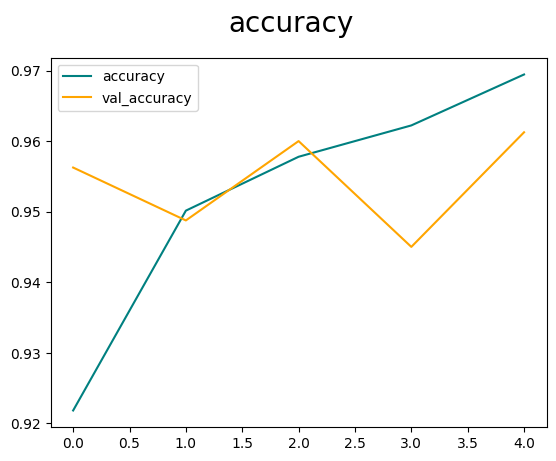

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend()
plt.show()

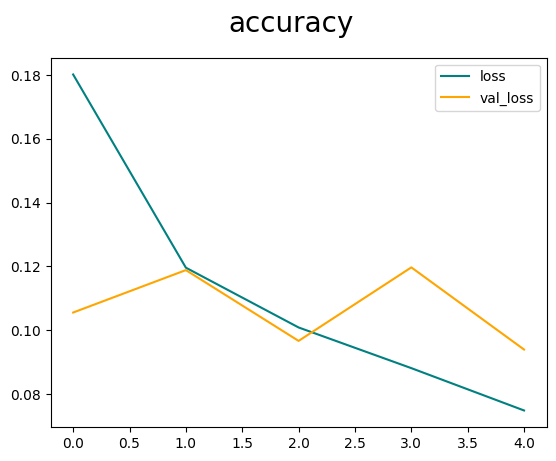

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('accuracy',fontsize=20)
plt.legend()
plt.show()

In [ ]:
time = end_time - start_time
time = time/60
time

43.841600461800894

In [ ]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [ ]:
for batch in test_data.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  accuracy.update_state(y, yhat)

1/1 [==============================] - 2s 2s/step


In [ ]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.95214355>

In [ ]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.955>

In [ ]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9535>

In [ ]:
import cv2

In [ ]:
# image = cv2.imread("download_dog.jpeg")
# plt.imshow(image)
# plt.show()

In [ ]:
# resized_image = tf.image.resize(image, IMAGE_SIZE)
# scaled_image = resized_image/255

In [ ]:
# scaled_image

In [ ]:
# img = np.expand_dims(scaled_image, 0)

In [ ]:
# y_hat = model.predict(img)

In [ ]:
# y_hat

In [ ]:
# class_names

In [ ]:
# if y_hat > 0.5:
#   print("dog")
#   plt.imshow(image)
# else:
#   print("cat")
#   plt.imshow(image)

Saving why-do-cats-have-whiskers-2000x786-1.jpg to why-do-cats-have-whiskers-2000x786-1.jpg
1/1 [==============================] - 0s 111ms/step


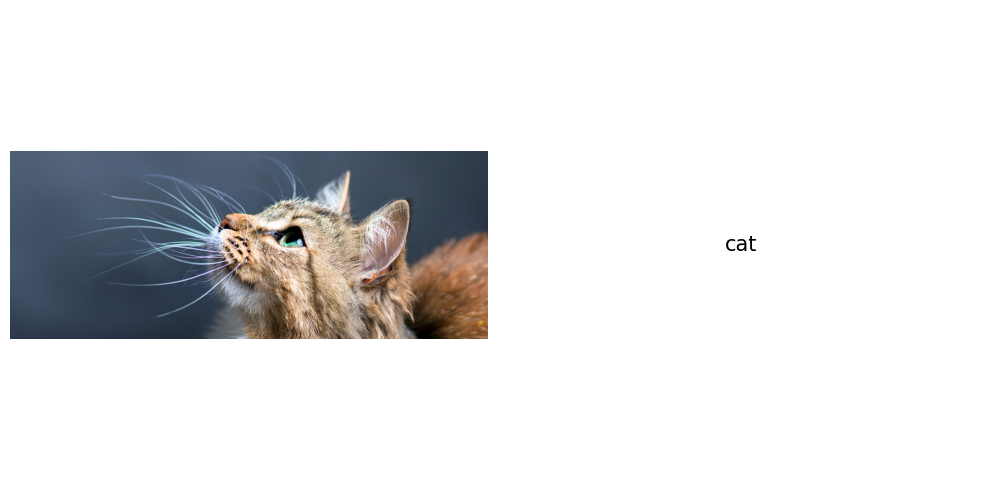

[[0.07803069]]


In [ ]:
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))

image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

resized_image = tf.image.resize(image, IMAGE_SIZE)
scaled_image = resized_image/255

img = np.expand_dims(scaled_image, 0)

y_hat = model.predict(img)

label = "dog" if y_hat > 0.5 else "cat"

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].axis('off')
axs[1].text(0.5, 0.5, label, fontsize=15, ha='center', va='center')
axs[1].axis('off')
plt.tight_layout()
plt.show()

print(y_hat)